# 1.0 *Project Title:* 
# **Aircraft Risk Assessment for Business Expansion**

### **Author:** Patrice Okoiti

## 1.1 **Data Understanding**
The selected Dataset https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses for our analysis is from the National Transportation Safety Board, available on Kaggle, detailing the civil aviation accidents and selected incidents in the United States and international waters between 1962 and 2023. It details aircraft accidents, including information on accident, aircraft specifications, weather conditions, and injury severity which are relevant to our analysis.

### 1.1.1 **column description**
| **Columns** | **Description** |
|-------------|-----------------|
| Event Id, Accident Number, Event Date, Location, Country, Latitude, Longitude, Airport Code, Airport Name | Unique identifiers for each accident and its location. |
| Make, Model, Aircraft Category, Amateur Built, Number of Engines, Engine Type | Details about the aircraft involved in the accident. |
| Injury Severity, Aircraft Damage, Weather Condition, Broad Phase of Flight | Risk factors contributing to the accident. |
| FAR Description, Schedule, Purpose of Flight, Air Carrier | Type of operations and flight purpose. |
| Total Fatal Injuries, Total Serious Injuries, Total Minor Injuries, Total Uninjured | Casualties per accident. |

## 1.2 **Business Problem**
Our company is diversifying their portfolio by venturing into the aviation industry. The aim is to purchase and operate aircraft for commercial and private enterprises. However, aviation involves significant safety risks, including accidents and operational hazards. The goal of this project is to analyze historical aircraft accident data to identify low-risk aircraft models and key risk factors that could impact operations.

### 1.2.1 **Objectives**
1.Identify the type of aircract with lowest accidents rate

2.Identify risk factors contributing to aircraft accidents

3.Evaluate flight risks based on operations




In [25]:
# First step is to import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1.3 **Data Mining**

This involves reading and loading our data on to our notebook based on the file format

In [26]:
# Next step is data loading
df = pd.read_csv('Data/AviationData.csv', encoding='latin-1', low_memory=False)
# Display the fisrt 5 rows of the dataframe
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## 1.4 **Data Preparation**

This involved inspecting our dataset to identify the shape, name of columns, datatype of each column and any columns with missing values

In [27]:
# Inspect the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

From the above information, we can deduce that our dataframe has a shape of 88889 rows and 31 columns. 
The dataframe has 5 numerical columns and 26 categorical column. All the 5 numerical columns have float datatype.
Of the 31 columns only the first 4 have complete entries, meaning 27 columns have missing values

In [28]:
# Get summary statistics of the data
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


The above information is a statistical summary of the numerical column of the dataframe

## 1.5 **Data Preparation**

This step involved validation of the dataset. This involved identifying and handling missing values and duplicates so as to get a clean dataset

In [29]:
# First Step is to create a copy of the original dataset
df_clean = df.copy() # Henceforth we will use the copy to clean our dataset

# Identify duplicates from the created copy of dataset
df_clean.duplicated().value_counts()

False    88889
dtype: int64

From the above output we can deduce that our dataset does not contain any duplicates

In [30]:
# Next we display a breakdown of missing values in our dataset
df_clean.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [31]:
# Next we replace our missing values 
for col in df_clean.columns:
    if str(df_clean[col].dtype) == 'object':
        df_clean[col].fillna('Unknown', inplace=True)
    else:
        df_clean[col].fillna(0, inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88889 non-null  object 
 5   Country                 88889 non-null  object 
 6   Latitude                88889 non-null  object 
 7   Longitude               88889 non-null  object 
 8   Airport.Code            88889 non-null  object 
 9   Airport.Name            88889 non-null  object 
 10  Injury.Severity         88889 non-null  object 
 11  Aircraft.damage         88889 non-null  object 
 12  Aircraft.Category       88889 non-null  object 
 13  Registration.Number     88889 non-null  object 
 14  Make                    88889 non-null

The above output involved creating a 'for' loop that iterates through our dataset columns and fill the missing values with the set values based on the datatype. Replacing the missing values helps avoid unexpected arrors and completeness of the dataset for analysis.Filling of the missing values in Categorical column with placeholder 'Unknown' and numeriacl column with zero allows me to maintain consistency of dataset without dropping valuable records, hence avoiding bias.

In [32]:
# Convert our date column to datetime
df_clean['Event.Date'] = pd.to_datetime(df_clean['Event.Date'])

# Create a year column on our dataset
df_clean['Year'] = df_clean['Event.Date'].dt.year.astype(int)

# Filter for the 21st century only
df_clean = df_clean[df_clean['Year'] >= 2000]

The above code filters out the discontinued and outdated aircrafts and leaves us with only aircrafts active in the 21st century

In [33]:
# Identify the unique operational purpose of each flight
df_clean['Purpose.of.flight'].unique()

array(['Positioning', 'Personal', 'Instructional', 'Unknown',
       'Aerial Observation', 'Ferry', 'Public Aircraft', 'Business',
       'Aerial Application', 'Executive/corporate', 'Other Work Use',
       'Flight Test', 'Skydiving', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

In [34]:
# filter out private and commercial aircraft
private = ["Personal", "Executive/corporate", "Business", "Ferry"]
commercial = ["Aerial Application", "Aerial Observation", "Air Carrier", "Public Aircraft"]

# Create an empty list
flight_purpose = []

for purpose in df_clean['Purpose.of.flight']:
    if purpose in private:
        flight_purpose.append('Private')
    elif purpose in commercial:
        flight_purpose.append('Commercial')
    else:
        flight_purpose.append('Other')

# Create a new   column by assigning it to the empty list created above
df_clean['Category of Purpose'] = flight_purpose

df_clean_filter = df_clean.loc[(df_clean['Category of Purpose'] == 'Private') | (df_clean['Category of Purpose'] == 'Commercial')]
# reassign the dataframe to sliced dataframe to convert it to dataframe
df_clean_filter = df_clean_filter.copy()
df_clean_filter.head()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Category of Purpose
47676,20001212X20327,Accident,ATL00FA019,2000-01-01,"MONTEAGLE, TN",United States,Unknown,Unknown,Unknown,Unknown,...,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,19-04-2001,2000,Private
47677,20001212X20383,Accident,LAX00LA063,2000-01-02,"VICTORVILLE, CA",United States,Unknown,Unknown,Unknown,Unknown,...,0.0,0.0,0.0,2.0,VMC,Cruise,Probable Cause,04-12-2000,2000,Private
47679,20001212X20364,Accident,FTW00LA067,2000-01-02,"CORNING, AR",United States,Unknown,Unknown,Unknown,Unknown,...,0.0,0.0,0.0,5.0,VMC,Cruise,Probable Cause,02-03-2001,2000,Private
47680,20001212X20358,Accident,FTW00LA057,2000-01-02,"ODESSA, TX",United States,Unknown,Unknown,Unknown,Unknown,...,0.0,0.0,0.0,2.0,VMC,Climb,Probable Cause,02-03-2001,2000,Private
47681,20001212X20344,Accident,DEN00FA037,2000-01-02,"TELLURIDE, CO",United States,Unknown,Unknown,Unknown,Unknown,...,1.0,0.0,0.0,0.0,IMC,Climb,Probable Cause,19-04-2001,2000,Private


The above code filters out all aircrafts that are were not utilized for private and commercial flight use

In [35]:
# Format the relevant categorical column
df_clean_filter['Weather.Condition'] = df_clean_filter['Weather.Condition'].str.title() 

# Edit the initials of weather to the full names
df_clean_filter['Weather.Condition'] = df_clean_filter['Weather.Condition'].apply( lambda x: 'Visual Meteorological Conditions' 
                                                                                  if x == 'Vmc' 
                                                                                  else 'Instrument Meteorological Conditions' 
                                                                                  if x == 'Imc' 
                                                                                  else "Unknown" 
                                                                                  if x == 'Unk' 
                                                                                  else x)
df_clean_filter['Make'] = df_clean_filter['Make'].str.title()
df_clean_filter['Model'] = df_clean_filter['Model'].str.upper()
df_clean_filter['Make_and_Model'] = df_clean_filter['Make'] + ' ' + df_clean_filter['Model']

The above code converts the first letter of the values in the 'Make' column to capital and converts all the 'Model' column values to Capital. This is important as it allows for consistency since python is case sensitive

## 1.6 **Data Evaluation**

### 1.6.1 Objective 1

Our first objective is to identify type of aircraft with the lowest accident rates. This will involve analyzing the number of accidents based on aircraft 'Make' and 'Model' to determine the aircraft with the lowest risk of accidents



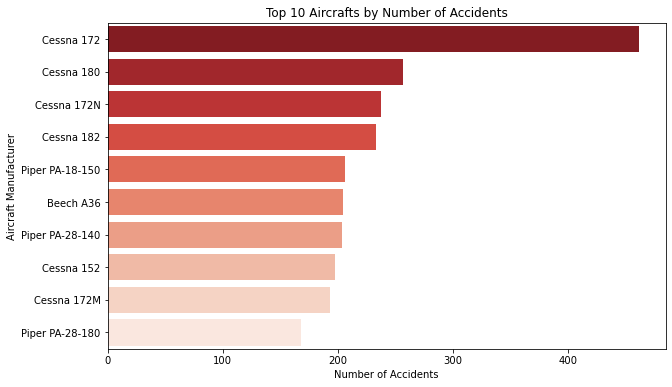

In [36]:
# Identify the top aircraft with the most accidents encountered
Most_accidents_by_aircraft = df_clean_filter['Make_and_Model'].value_counts().head(10)


# lets plot in horizontal bar graph
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(y=Most_accidents_by_aircraft.index, x=Most_accidents_by_aircraft.values, palette="Reds_r")
ax.set(title='Top 10 Aircrafts by Number of Accidents', xlabel='Number of Accidents', ylabel= 'Aircraft Manufacturer')

#save the image
plt.savefig('Images/Risky-aircrafts.png')

From the plot we see the top 10 aircrafts have encountered most accidents between 2000 and 2023. 

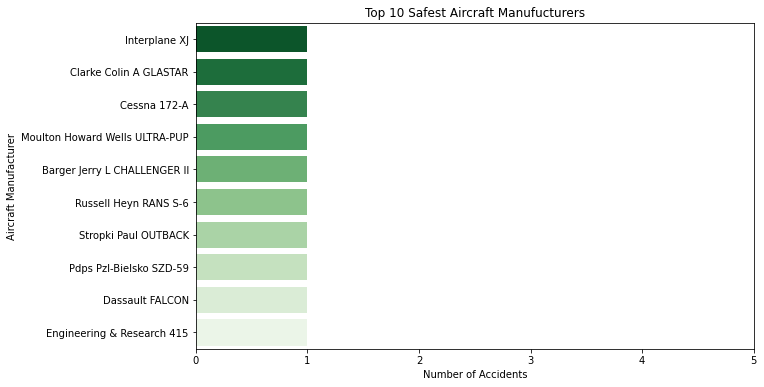

In [37]:
# Identify aircraft with the lowest number of accidents
safest_aircraft_manufacturer = df_clean_filter['Make_and_Model'].value_counts().nsmallest(10)
safest_aircraft_manufacturer

# lets also plot the above
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(y=safest_aircraft_manufacturer.index, x=safest_aircraft_manufacturer.values, palette='Greens_r')
ax.set(title='Top 10 Safest Aircraft Manufucturers', xlabel='Number of Accidents', ylabel= 'Aircraft Manufacturer', xlim=(0, 5))

#save the image
plt.savefig('Images/Safest-aircrafts.png')

From the above output we see the safest aircraft based on the number of accidents encountered between 2000 and 2023. 
However, a lower number of accidents does not necessarily mean its the safest and having a large number of accidents does not necessarily mean its the riskiest without factoring in the number of aircrafts in operation during the period

### 1.6.2 Objective 2

Our second objective requires us to identify the risk factors contributing to accidents. Here we analyse the Weather conditions and the broad phase of the aircraft, for example landing or taking off, during the accident

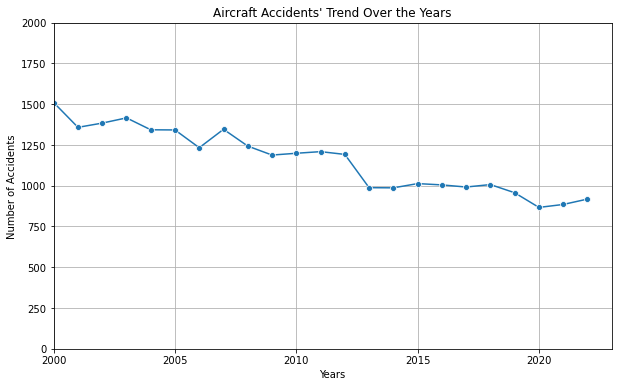

In [38]:
# Number of accidents per aircraft per year
yearly_accidents = df_clean_filter.groupby('Year')['Make_and_Model'].count()
yearly_accidents

fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(x=yearly_accidents.index, y=yearly_accidents.values, marker='o')
ax.set(title="Aircraft Accidents' Trend Over the Years", xlabel='Years', ylabel='Number of Accidents', ylim=(0,2000), 
       xlim=(2000,2023))
ax.grid()

#save the image
plt.savefig('Images/Accident-trend.png')

From the above output we can see that the overall accidents risk associated with the aircrafts is at a steady decline over the years

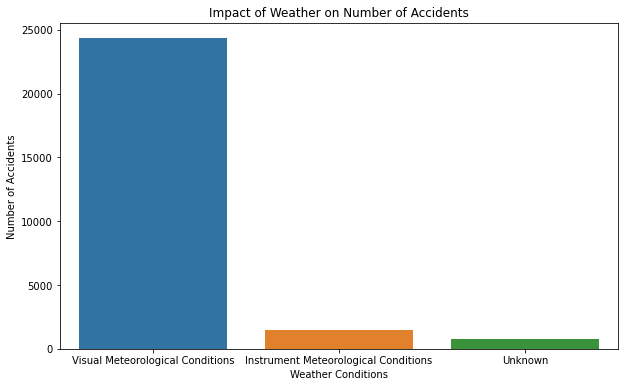

In [39]:
# Weather as risk factor in aircraft accidents
weather_risk = df_clean_filter['Weather.Condition'].value_counts()

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(y=weather_risk.values, x=weather_risk.index)
ax.set(title='Impact of Weather on Number of Accidents', ylabel= 'Number of Accidents', xlabel = 'Weather Conditions')

#save the image
plt.savefig('Images/Weather-impact.png')

From above output we can see that most accidents happened during Visual Meteorolofical Conditions, meaning that they happened when the weather conditions allowed the pilots to fly with visual references to the ground and other aircrafts without solely relying on intruments. This rules out weather conditions as primary cause of aircraft accidents

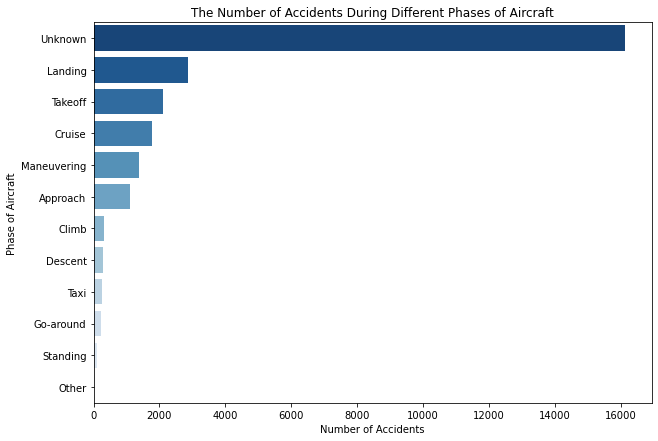

In [40]:
# Identify the phase the aircraft was at time of accident
aircraft_phase_on_accident = df_clean_filter['Broad.phase.of.flight'].value_counts()

fig, ax

fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(y=aircraft_phase_on_accident.index, x=aircraft_phase_on_accident.values, palette='Blues_r')
ax.set(title='The Number of Accidents During Different Phases of Aircraft', ylabel= 'Phase of Aircraft', 
       xlabel = 'Number of Accidents')

#save the image
plt.savefig('Images/Flight-phase.png')

From the above output we can clearly deduce that phase of accidents for most of accidents remain clearly unknown. But We can also clearly deduce that a significant number of accidents happened during landing, taking off and during cruising, hence we should view these 3 phases as major risk factors associated with aircraft accidents. 

### 1.6.3 Objective 3

Our final objective is to evaluate risk factors associated with the opeartional purpose of the aircraft. This involved analysing the risk factors associated with purpose of aircraft, that is, private and commercial.

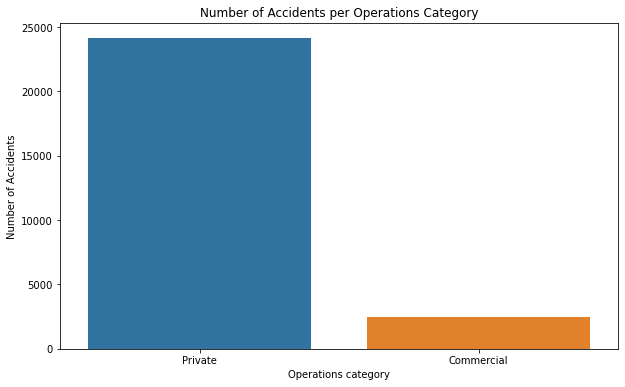

In [41]:
#Identify number of accidents based on the two operational purposes
operational_category = df_clean_filter['Category of Purpose'].value_counts()

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=operational_category.index, y=operational_category.values)
ax.set(title='Number of Accidents per Operations Category', xlabel='Operations category', ylabel='Number of Accidents')

#save the image
plt.savefig('Images/Operations-risk.png')

From the above output we can clearly see that venturing into private flights is riskier compared to commercial fight due to the number of accidents by private flights

In [42]:
# Next we save our cleaned data which will be useful during creation Dashboard
df_clean_filter.to_csv('Data/CleanAviationData.csv')

## 1.7 Summary

From out analysis of the Aviation Data we can conclude the following:

1. The aircrafts with the high number of accidents may be due to high levels of usage

2. Adverse weather conditions is a significant risk factor in aircraft accidents but it has not been the primary risk factor in the  
21st Century. Additionally, Significant number of accidents often occur during landing, taking off and cruising

3. Private flights have encountered a significant high number of accidents as compared to commercial flights
